# ☆Fine-tuning

### Pre-processing of emo_dial : Oversampling model
* how reflected last_emotion_word in reference is high 

### emotion embedding size : 64 
* Diversity, dist_1 and BLUE is comparably high

### Pre-training epoch (twitter dataset) : 21 (5.4493)
* Loss is lowest



# ☆Comparing below two points
### ☆Pre-training epoch (em_dial of all domain) 


## 1. not using emotion_word in last part: 14 (5.5844)
* Loss is lowest
####  Fine-tuning model : cleaning:  exercies:  lunch: game: sleep: 

## 2. using emotion_word in last part: 27 (5.1173)
* Loss is lowest 
####  Fine-tuning model : cleaning:  exercies:  lunch: game: sleep: 



In [4]:
from matplotlib import pyplot as plt
import numpy as np
import math

In [5]:
def plot_loss(log_path, ylim=None, MAX=-1,y_max=None):
    f = open(log_path, 'r')
    log_line = f.readlines()
    [print(log_line[i]) for i in range(23)]
    
    log_valid = [float(i.split(" ")[3].strip('\n')) for i in log_line if i.split(" ")[0] == "Valid"]
    log_train = [float(i.split(" ")[4].strip('\n')) for i in log_line if i.split(" ")[0] == "Train"]
    print("chance rate of loss : ", math.log(1/32000))
    print("initial validation loss : ", log_valid[0])
    #print(log_valid)
    log_val = log_valid[1:MAX+1]
    min_val = min(log_val)
    min_tra = min(log_train)
    [print("Minimize validation loss({}) : {} Epoch ".format(min_val, i+1)) 
           for i, l in enumerate(log_val) if l == min_val ]
    [print("Minimize training loss({}) : {} Epoch ".format(min_tra, i+1)) 
           for i, l in enumerate(log_train) if l == min_tra ]
    log_train = log_train[:MAX]
    x = np.arange(len(log_val))
    y1 = np.array(log_train)
    y2 = np.array(log_val)
    plt.figure()
    plt.plot(x,y1)
    plt.plot(x,y2)
    plt.legend()
    if ylim:
        plt.ylim(ylim[0],ylim[1])
    plt.grid()
    plt.show

## emotion embedding size : 64

In [42]:
log_path_em64tw =  "../../emotion_dialogue_model/log/train20190407230240.log"

No handles with labels found to put in legend.


Data directory: ../data/twitter_dial/splitted

Vocaburary file: ../data/twitter_dial/vocab/spvocab_tw_label.model

Model prefix: ./model/0407_64emoTw

Use emotion: False

Checkpoint path: None

Pretrained: False

Fix embedding: False

UNK_id: 3

dropout: 0.1

emotion_size: 64

hidden_size: 256

max_epoch: 100

decoder_learning_ratio: 1.0

learning_rate: 0.0003

batch_size: 64

lr_decay: 0.5773502691896258

max_gradient: 50.0

decay_step: 120000

EOS_id: 2

teacher_forcing_ratio: 1.0

l2_pooling: False

SOS_id: 1

num_layers: 2

chance rate of loss :  -10.373491181781864
initial validation loss :  10.3827
Minimize validation loss(5.4493) : 21 Epoch 
Minimize training loss(4.9458) : 52 Epoch 
Minimize training loss(4.9458) : 64 Epoch 


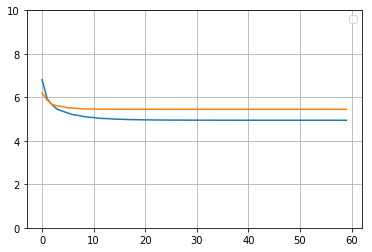

In [36]:
plot_loss(log_path_em64tw, ylim=[0,10],MAX=60)

# ☆ twitter  -> over-sampling all

## emotion embedding size : 64

In [46]:
log_path_em64tw_overall = "../../emotion_dialogue_model/log/train20190415215339.log"

No handles with labels found to put in legend.


Data directory: ../data/em_dial/splitted/over_sample/all

Vocaburary file: ../data/twitter_dial/vocab/spvocab_tw_label.model

Model prefix: ./model/0415_64emoTw_overall

Use emotion: True

Checkpoint path: ./model/0407_64emoTw_21.mdl

Pretrained: True

Fix embedding: False

decoder_learning_ratio: 1.0

UNK_id: 3

l2_pooling: False

teacher_forcing_ratio: 1.0

batch_size: 64

hidden_size: 256

lr_decay: 0.5773502691896258

EOS_id: 2

inf_last: False

emotion_size: 64

num_layers: 2

SOS_id: 1

max_gradient: 50.0

decay_step: 12500

learning_rate: 3e-05

PAD_id: 0

chance rate of loss :  -10.373491181781864
initial validation loss :  7.6136
Minimize validation loss(5.5844) : 14 Epoch 
Minimize training loss(2.6638) : 58 Epoch 


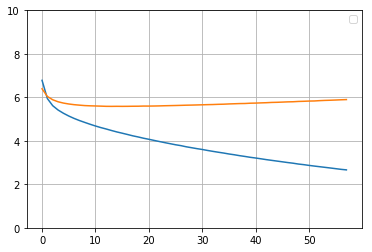

In [47]:
plot_loss(log_path_em64tw_overall,ylim=[0,10], MAX=60)

# ☆ twitter  -> over-sampling all -> over-sampling one domaing

## cleaning

In [10]:
log_path_em64tw_overall_overcleaning = "../../emotion_dialogue_model/log/train20190424202734.log"

No handles with labels found to put in legend.


Data directory: ../data/em_dial/splitted/over_sample/cleaning

Vocaburary file: ../data/twitter_dial/vocab/spvocab_tw_label.model

Model prefix: ./model/0424_64emoTw21_overall14_cleaning

Use emotion: True

Checkpoint path: ./model/0415_64emoTw_overall_14.mdl

Pretrained: True

Fix embedding: False

MAX_UTTR_LEN: 50

teacher_forcing_ratio: 1.0

learning_rate: 3e-05

emotion_size: 64

PAD_id: 0

dropout: 0.1

max_epoch: 200

EOS_id: 2

decoder_learning_ratio: 1.0

hidden_size: 256

tfd_lambda: 0.4

decay_step: 2500

UNK_id: 3

max_gradient: 50.0

l2_pooling: False

lr_decay: 0.5773502691896258

chance rate of loss :  -10.373491181781864
initial validation loss :  6.2619
Minimize validation loss(6.1892) : 5 Epoch 
Minimize training loss(1.1558) : 198 Epoch 


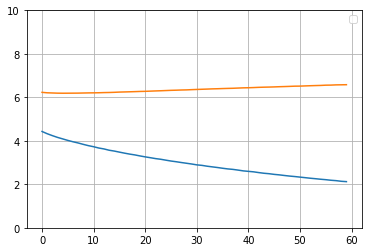

In [8]:
plot_loss(log_path_em64tw_overall_overcleaning,ylim=[0,10], MAX=60)

## exercise

In [14]:
log_path_em64tw_overall_overexercise = "../../emotion_dialogue_model/log/train20190425103135.log"

No handles with labels found to put in legend.


Data directory: ../data/em_dial/splitted/over_sample/exercise

Vocaburary file: ../data/twitter_dial/vocab/spvocab_tw_label.model

Model prefix: ./model/0424_64emoTw21_overall14_exercise

Use emotion: True

Checkpoint path: ./model/0415_64emoTw_overall_14.mdl

Pretrained: True

Fix embedding: False

MAX_UTTR_LEN: 50

decoder_learning_ratio: 1.0

UNK_id: 3

learning_rate: 3e-05

l2_pooling: False

num_layers: 2

dropout: 0.1

hidden_size: 256

max_gradient: 50.0

max_epoch: 200

lr_decay: 0.5773502691896258

EOS_id: 2

inf_last: False

teacher_forcing_ratio: 1.0

batch_size: 64

SOS_id: 1

chance rate of loss :  -10.373491181781864
initial validation loss :  5.7259
Minimize validation loss(5.6867) : 4 Epoch 
Minimize training loss(2.9162) : 31 Epoch 


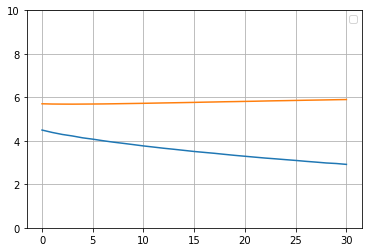

In [12]:
plot_loss(log_path_em64tw_overall_overexercise,ylim=[0,10], MAX=60)

## lunch

In [15]:
log_path_em64tw_overall_overlunch = "../../emotion_dialogue_model/log/train20190425103346.log"

No handles with labels found to put in legend.


Data directory: ../data/em_dial/splitted/over_sample/lunch

Vocaburary file: ../data/twitter_dial/vocab/spvocab_tw_label.model

Model prefix: ./model/0424_64emoTw21_overall14_lunch

Use emotion: True

Checkpoint path: ./model/0415_64emoTw_overall_14.mdl

Pretrained: True

Fix embedding: False

batch_size: 64

l2_pooling: False

teacher_forcing_ratio: 1.0

EOS_id: 2

inf_last: False

PAD_id: 0

hidden_size: 256

learning_rate: 3e-05

tfd_lambda: 0.4

max_gradient: 50.0

emotion_size: 64

SOS_id: 1

dropout: 0.1

UNK_id: 3

decoder_learning_ratio: 1.0

MAX_UTTR_LEN: 50

chance rate of loss :  -10.373491181781864
initial validation loss :  5.9859
Minimize validation loss(5.886) : 8 Epoch 
Minimize training loss(2.4388) : 51 Epoch 


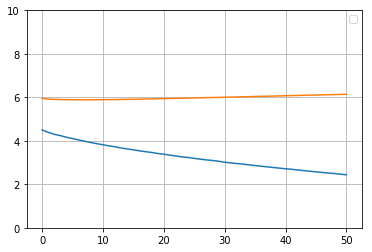

In [16]:
plot_loss(log_path_em64tw_overall_overlunch,ylim=[0,10], MAX=60)

## game

In [20]:
log_path_em64tw_overall_overgame = "../../emotion_dialogue_model/log/train20190425103702.log"

No handles with labels found to put in legend.


Data directory: ../data/em_dial/splitted/over_sample/game

Vocaburary file: ../data/twitter_dial/vocab/spvocab_tw_label.model

Model prefix: ./model/0424_64emoTw21_overall14_game

Use emotion: True

Checkpoint path: ./model/0415_64emoTw_overall_14.mdl

Pretrained: True

Fix embedding: False

decay_step: 2500

hidden_size: 256

MAX_UTTR_LEN: 50

decoder_learning_ratio: 1.0

SOS_id: 1

teacher_forcing_ratio: 1.0

max_gradient: 50.0

inf_last: False

EOS_id: 2

emotion_size: 64

UNK_id: 3

batch_size: 64

lr_decay: 0.5773502691896258

tfd_lambda: 0.4

learning_rate: 3e-05

PAD_id: 0

chance rate of loss :  -10.373491181781864
initial validation loss :  5.6518
Minimize validation loss(5.5945) : 5 Epoch 
Minimize training loss(2.8565) : 31 Epoch 


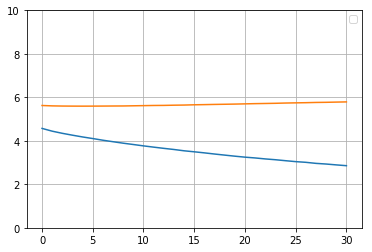

In [18]:
plot_loss(log_path_em64tw_overall_overgame,ylim=[0,10], MAX=60)

## sleep

In [24]:
log_path_em64tw_overall_oversleep = "../../emotion_dialogue_model/log/train20190425103557.log"

No handles with labels found to put in legend.


Data directory: ../data/em_dial/splitted/over_sample/sleep

Vocaburary file: ../data/twitter_dial/vocab/spvocab_tw_label.model

Model prefix: ./model/0424_64emoTw21_overall14_sleep

Use emotion: True

Checkpoint path: ./model/0415_64emoTw_overall_14.mdl

Pretrained: True

Fix embedding: False

MAX_UTTR_LEN: 50

SOS_id: 1

l2_pooling: False

max_gradient: 50.0

decay_step: 2500

decoder_learning_ratio: 1.0

learning_rate: 3e-05

PAD_id: 0

dropout: 0.1

max_epoch: 200

hidden_size: 256

num_layers: 2

emotion_size: 64

batch_size: 64

UNK_id: 3

teacher_forcing_ratio: 1.0

chance rate of loss :  -10.373491181781864
initial validation loss :  6.0723
Minimize validation loss(6.0293) : 3 Epoch 
Minimize training loss(2.0235) : 53 Epoch 


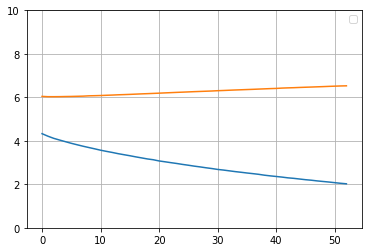

In [25]:
plot_loss(log_path_em64tw_overall_oversleep,ylim=[0,10], MAX=60)

# Using Emotion_word of last of references in training
### ☆ twitter  -> over-sampling all -> over-sampling one domaing

## cleaning

In [28]:
log_path_em64tw_overallLastEm_overcleaning = "../../emotion_dialogue_model/log/train20190425181258.log"

No handles with labels found to put in legend.


Data directory: ../data/em_dial/splitted/lastEm/over_sample/cleaning

Vocaburary file: ../data/twitter_dial/vocab/spvocab_tw_label.model

Model prefix: ./model/0422_64emoTw21_overallEm27_cleaning

Use emotion: True

Checkpoint path: ./model/0422_64emoTw21_overallEm_27.mdl

Pretrained: True

Fix embedding: False

decoder_learning_ratio: 1.0

hidden_size: 256

dropout: 0.1

SOS_id: 1

EOS_id: 2

max_epoch: 200

emotion_size: 64

inf_last: False

PAD_id: 0

decay_step: 2500

teacher_forcing_ratio: 1.0

num_layers: 2

UNK_id: 3

learning_rate: 3e-05

max_gradient: 50.0

l2_pooling: False

chance rate of loss :  -10.373491181781864
initial validation loss :  5.3721
Minimize validation loss(5.3199) : 5 Epoch 
Minimize training loss(1.6014) : 63 Epoch 


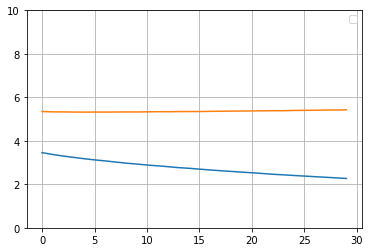

In [29]:
plot_loss(log_path_em64tw_overallLastEm_overcleaning,ylim=[0,10], MAX=30)

## exercise

In [45]:
log_path_em64tw_overallLastEm_overexercise = "../../emotion_dialogue_model/log/train20190425221716.log"

No handles with labels found to put in legend.


Data directory: ../data/em_dial/splitted/lastEm/over_sample/exercise

Vocaburary file: ../data/twitter_dial/vocab/spvocab_tw_label.model

Model prefix: ./model/0422_64emoTw21_overallEm27_exercise

Use emotion: True

Checkpoint path: ./model/0422_64emoTw21_overallEm_27.mdl

Pretrained: True

Fix embedding: False

hidden_size: 256

decay_step: 2500

EOS_id: 2

lr_decay: 0.5773502691896258

decoder_learning_ratio: 1.0

batch_size: 64

SOS_id: 1

emotion_size: 64

learning_rate: 3e-05

UNK_id: 3

PAD_id: 0

l2_pooling: False

max_gradient: 50.0

num_layers: 2

dropout: 0.1

teacher_forcing_ratio: 1.0

chance rate of loss :  -10.373491181781864
initial validation loss :  4.9706
Minimize validation loss(4.9198) : 7 Epoch 
Minimize training loss(2.5968) : 21 Epoch 


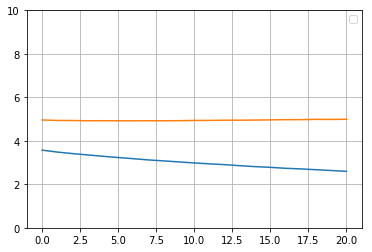

In [46]:
plot_loss(log_path_em64tw_overallLastEm_overexercise,ylim=[0,10], MAX=30)

## lunch

In [34]:
log_path_em64tw_overallLastEm_overlunch = "../../emotion_dialogue_model/log/train20190425181428.log"

No handles with labels found to put in legend.


Data directory: ../data/em_dial/splitted/lastEm/over_sample/lunch

Vocaburary file: ../data/twitter_dial/vocab/spvocab_tw_label.model

Model prefix: ./model/0422_64emoTw21_overallEm27_lunch

Use emotion: True

Checkpoint path: ./model/0422_64emoTw21_overallEm_27.mdl

Pretrained: True

Fix embedding: False

UNK_id: 3

decoder_learning_ratio: 1.0

SOS_id: 1

PAD_id: 0

batch_size: 64

teacher_forcing_ratio: 1.0

lr_decay: 0.5773502691896258

hidden_size: 256

EOS_id: 2

tfd_lambda: 0.4

dropout: 0.1

decay_step: 2500

max_gradient: 50.0

num_layers: 2

emotion_size: 64

learning_rate: 3e-05

chance rate of loss :  -10.373491181781864
initial validation loss :  5.0626
Minimize validation loss(4.9612) : 11 Epoch 
Minimize training loss(1.1601) : 125 Epoch 


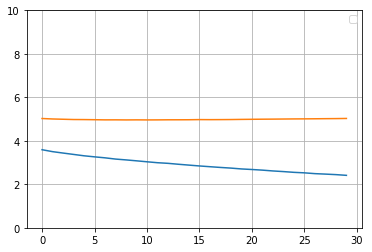

In [35]:
plot_loss(log_path_em64tw_overallLastEm_overlunch,ylim=[0,10], MAX=30)

## game

In [41]:
log_path_em64tw_overallLastEm_overgame = "../../emotion_dialogue_model/log/train20190425182413.log"

No handles with labels found to put in legend.


Data directory: ../data/em_dial/splitted/lastEm/over_sample/game

Vocaburary file: ../data/twitter_dial/vocab/spvocab_tw_label.model

Model prefix: ./model/0422_64emoTw21_overallEm27_game

Use emotion: True

Checkpoint path: ./model/0422_64emoTw21_overallEm_27.mdl

Pretrained: True

Fix embedding: False

num_layers: 2

batch_size: 64

hidden_size: 256

tfd_lambda: 0.4

lr_decay: 0.5773502691896258

teacher_forcing_ratio: 1.0

emotion_size: 64

PAD_id: 0

decay_step: 2500

max_gradient: 50.0

learning_rate: 3e-05

max_epoch: 200

EOS_id: 2

MAX_UTTR_LEN: 50

dropout: 0.1

SOS_id: 1

chance rate of loss :  -10.373491181781864
initial validation loss :  4.5992
Minimize validation loss(4.5361) : 4 Epoch 
Minimize training loss(1.3146) : 91 Epoch 


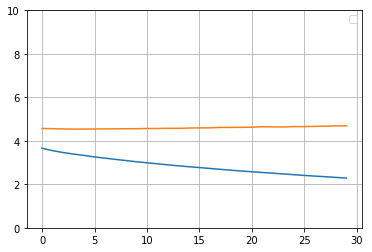

In [38]:
plot_loss(log_path_em64tw_overallLastEm_overgame,ylim=[0,10], MAX=30)

## sleep

In [40]:
log_path_em64tw_overallLastEm_oversleep = "../../emotion_dialogue_model/log/train20190425181656.log"

No handles with labels found to put in legend.


Data directory: ../data/em_dial/splitted/lastEm/over_sample/sleep

Vocaburary file: ../data/twitter_dial/vocab/spvocab_tw_label.model

Model prefix: ./model/0422_64emoTw21_overallEm27_sleep

Use emotion: True

Checkpoint path: ./model/0422_64emoTw21_overallEm_27.mdl

Pretrained: True

Fix embedding: False

PAD_id: 0

tfd_lambda: 0.4

max_epoch: 200

emotion_size: 64

decoder_learning_ratio: 1.0

lr_decay: 0.5773502691896258

inf_last: False

MAX_UTTR_LEN: 50

UNK_id: 3

learning_rate: 3e-05

dropout: 0.1

decay_step: 2500

l2_pooling: False

hidden_size: 256

num_layers: 2

teacher_forcing_ratio: 1.0

chance rate of loss :  -10.373491181781864
initial validation loss :  5.0738
Minimize validation loss(5.0126) : 4 Epoch 
Minimize training loss(0.9002) : 142 Epoch 


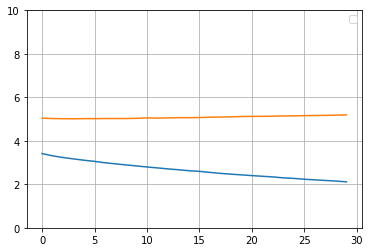

In [42]:
plot_loss(log_path_em64tw_overallLastEm_oversleep,ylim=[0,10], MAX=30)